Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [480]:
## Import the necessary libraries:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.gofplots import qqplot


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split


from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score,classification_report,
                             precision_score,roc_auc_score,f1_score,mean_absolute_error,roc_curve)


import pickle
import logging 
import traceback

In [450]:
## Load the dataset using pandas:

df = pd.read_csv(r"F:\Ineuron DS\Assignment\ObesityDataSet_raw_and_data_sinthetic.csv")

In [451]:
## Checking top 5 rows

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [452]:
## Checking Details Information related with Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [453]:
## Checking Rows & Columns Availabale in Dataset

df.shape

(2111, 17)

In [454]:
## Checking Null Values

df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [455]:
# Type casting Age

df['Age'] = df['Age'].astype(int)

In [456]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [457]:
# numerical and categorical features

numerical_features =[i  for i in df.columns if df[i].dtype != 'O']

categorical_features = [i  for i in df.columns if df[i].dtype == 'O' ]

In [458]:
numerical_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [459]:
categorical_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [436]:
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


#### EDA

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Gender', ylabel='count'>

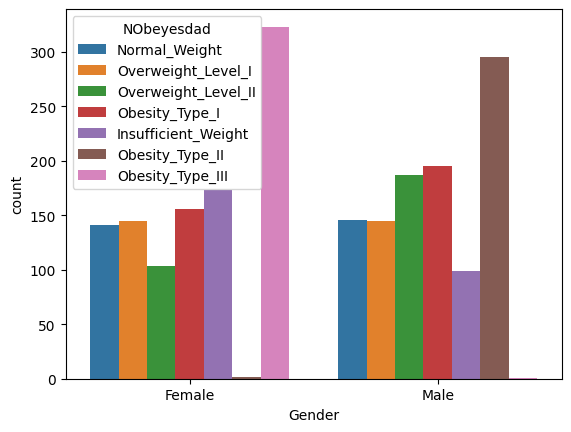

In [229]:
# Observational count of gendr

sns.countplot(df['Gender'], hue = df['NObeyesdad'])

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Age', ylabel='Density'>

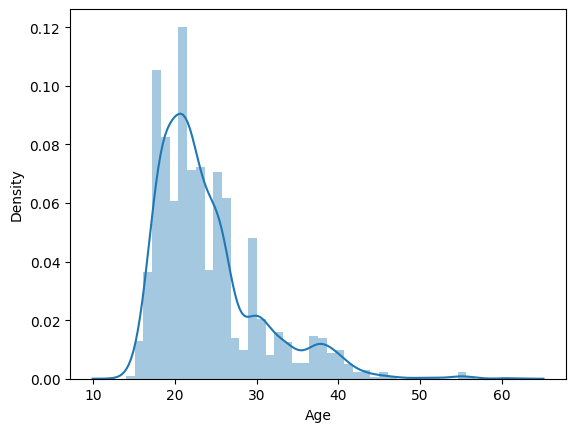

In [230]:
# Distribution of age

sns.distplot(df['Age'])

In [231]:
age_15_40 = df[(df['Age'] < 40) & (df['Age'] > 15)]['NObeyesdad'].value_counts()
age_15_40

Obesity_Type_I         325
Obesity_Type_III       324
Obesity_Type_II        285
Normal_Weight          284
Overweight_Level_I     283
Overweight_Level_II    273
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

Text(0.5, 1.0, 'Obesity rate b/t age 15 to 40')

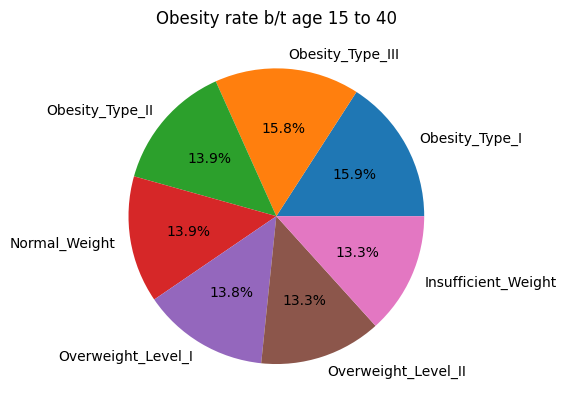

In [16]:
# Analysing NObeyesdad for the age of 15 to 40

plt.pie(age_15_40.values,autopct='%.1f%%',labels = age_15_40.index)
plt.title('Obesity rate b/t age 15 to 40')


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='SMOKE', ylabel='count'>

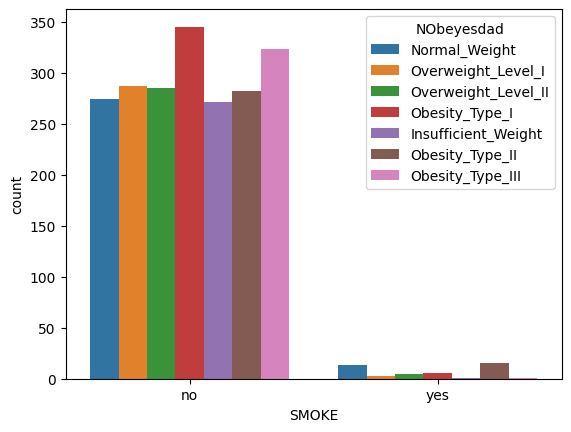

In [18]:
sns.countplot(df['SMOKE'],hue = df['NObeyesdad'])

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='family_history_with_overweight', ylabel='count'>

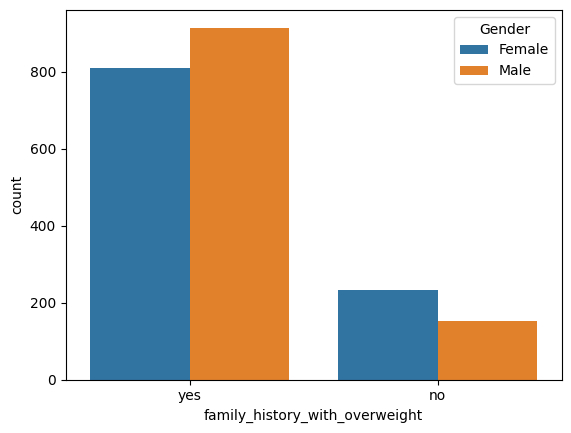

In [25]:
sns.countplot(df['family_history_with_overweight'],hue = df['Gender'])

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='CAEC', ylabel='count'>

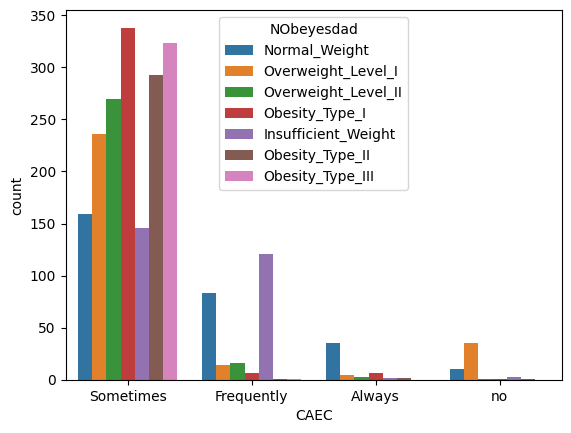

In [32]:
sns.countplot(df['CAEC'],hue = df['NObeyesdad'])

In [17]:
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [44]:
c =  df.groupby(['MTRANS'])['NObeyesdad']
c.value_counts()

MTRANS                 NObeyesdad         
Automobile             Obesity_Type_I         110
                       Obesity_Type_II         95
                       Overweight_Level_II     94
                       Overweight_Level_I      66
                       Insufficient_Weight     46
                       Normal_Weight           45
                       Obesity_Type_III         1
Bike                   Normal_Weight            4
                       Overweight_Level_I       2
                       Obesity_Type_II          1
Motorbike              Normal_Weight            6
                       Obesity_Type_I           3
                       Overweight_Level_I       1
                       Overweight_Level_II      1
Public_Transportation  Obesity_Type_III       323
                       Obesity_Type_I         236
                       Insufficient_Weight    220
                       Overweight_Level_I     212
                       Normal_Weight          200
       

OBSERVATIONS:

1) Obesity type III is more common in Female and Obesity type II in male.

2) Obesity type III and Obesity type II may be gender biased.

3) Between Age 15 to 40, the Obesity rate is higher.

4) Not enough data on whether a smoking person have higher chance of Obesity or not.

5) A slight higher chance of obesity for men if they have a family history rather than women

6) For CAEC - Frequent Normal weight is comparitively high

7) Mtrans Seams to be biased as Public_Transportation datas are more. So couldn't come to conclusion which impacts obesity

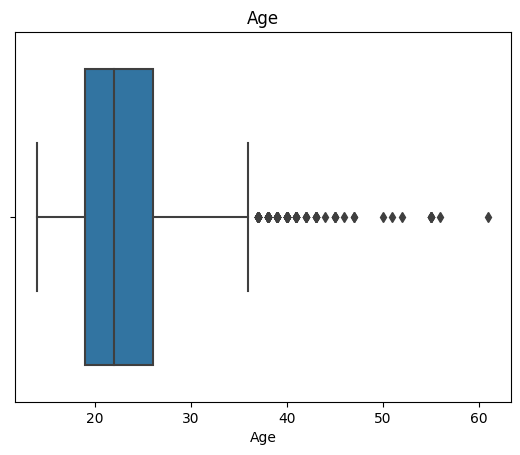

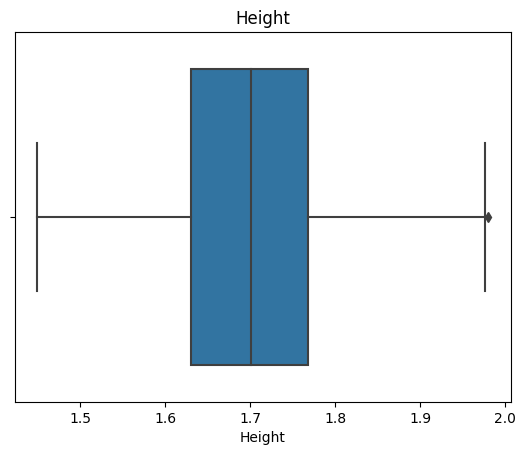

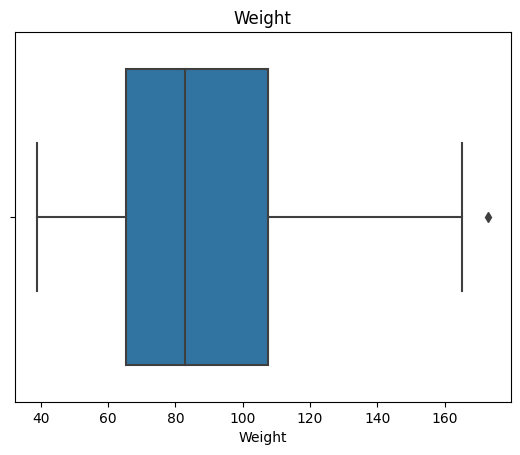

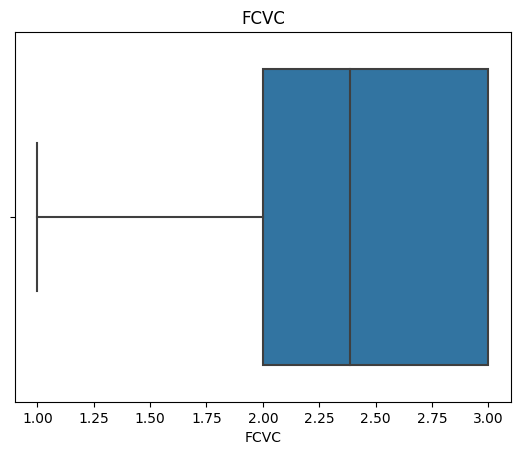

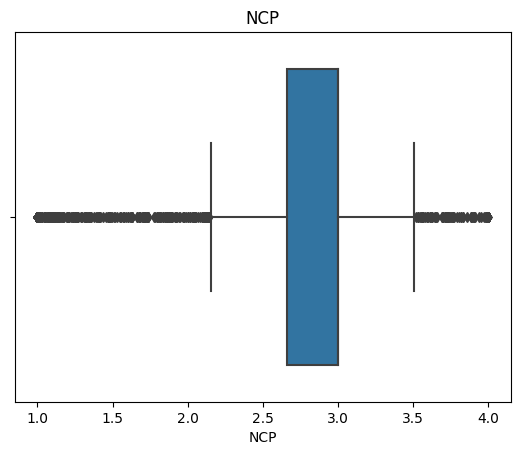

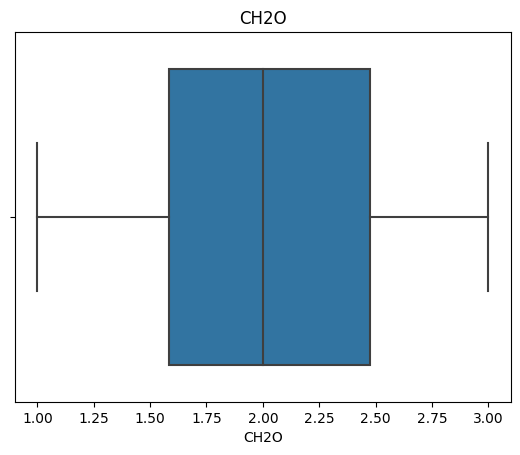

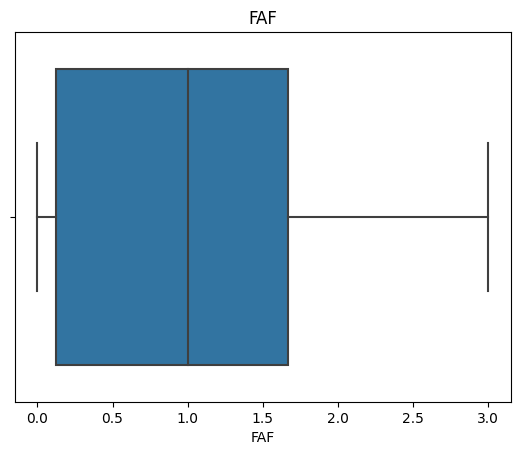

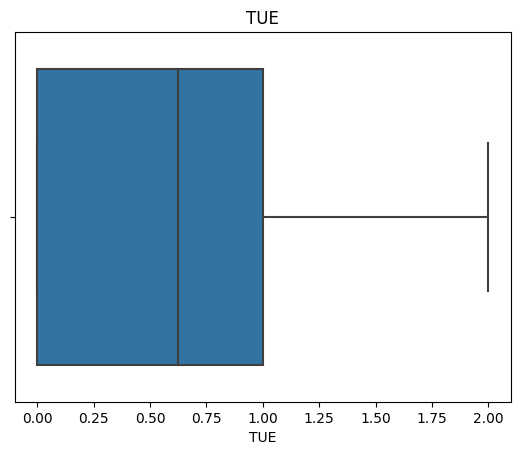

In [439]:
# Outliers 

for i in numerical_features:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [460]:
# Lable Encoding Categorical feature

label_encoder = LabelEncoder()

for i in categorical_features:
    df[i] = label_encoder.fit_transform(df[i])

In [461]:
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1


<Figure size 700x300 with 0 Axes>

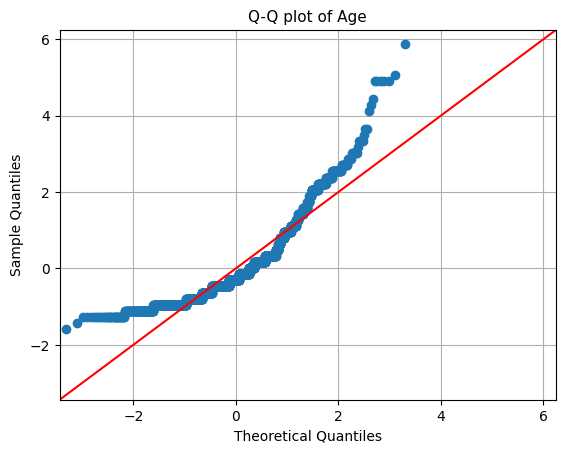

<Figure size 700x300 with 0 Axes>

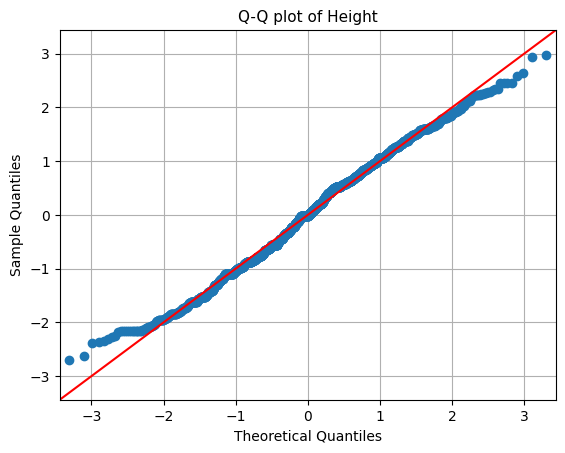

<Figure size 700x300 with 0 Axes>

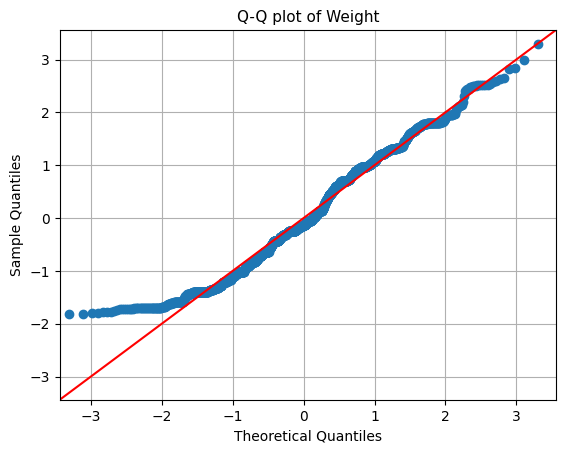

<Figure size 700x300 with 0 Axes>

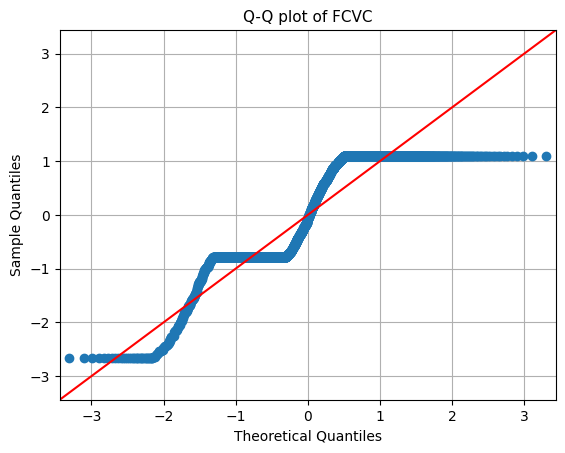

<Figure size 700x300 with 0 Axes>

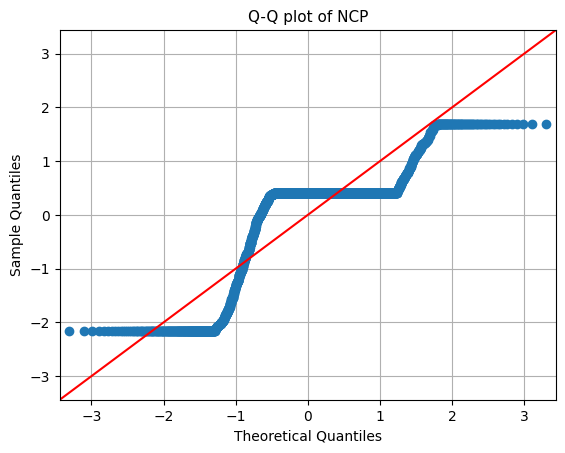

<Figure size 700x300 with 0 Axes>

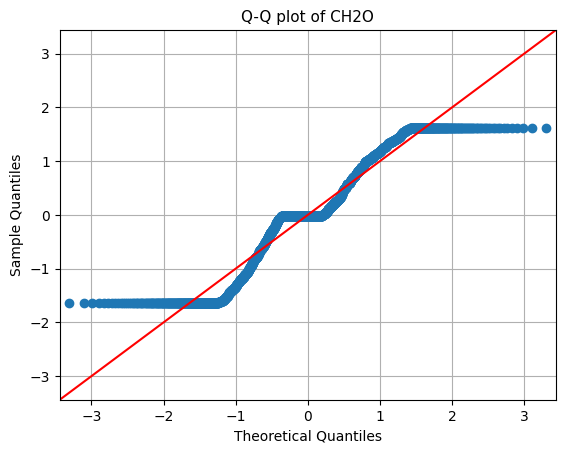

<Figure size 700x300 with 0 Axes>

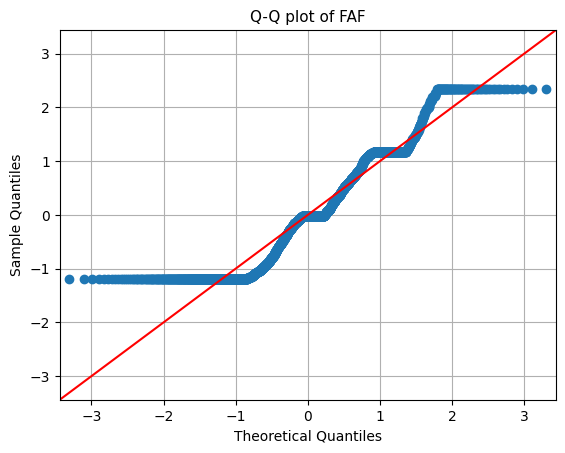

<Figure size 700x300 with 0 Axes>

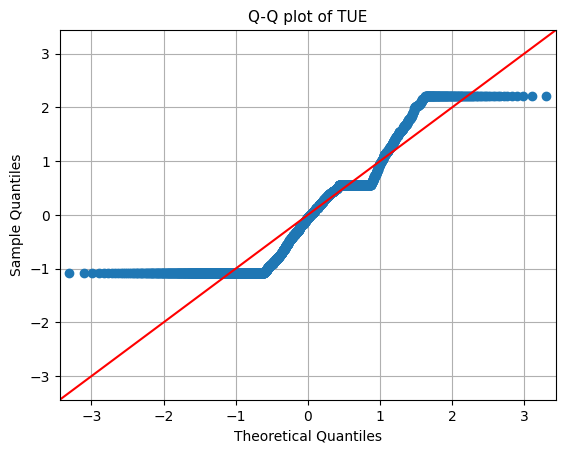

In [470]:
# Distribution of numerical variable 

for i in numerical_features:
    plt.figure(figsize=(7,3))
    qqplot(df[i],fit = True,line = '45')
    plt.title("Q-Q plot of {}".format(i),fontsize=11)
    plt.grid(True)
    plt.show()

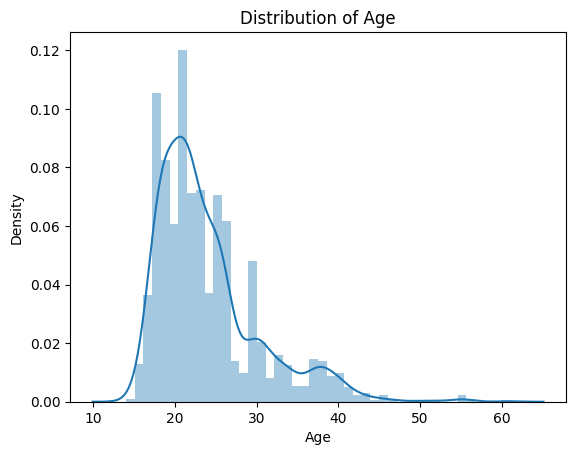

In [471]:
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

Height and weight follows normal distribution but age seams to be skewed right

<Axes: >

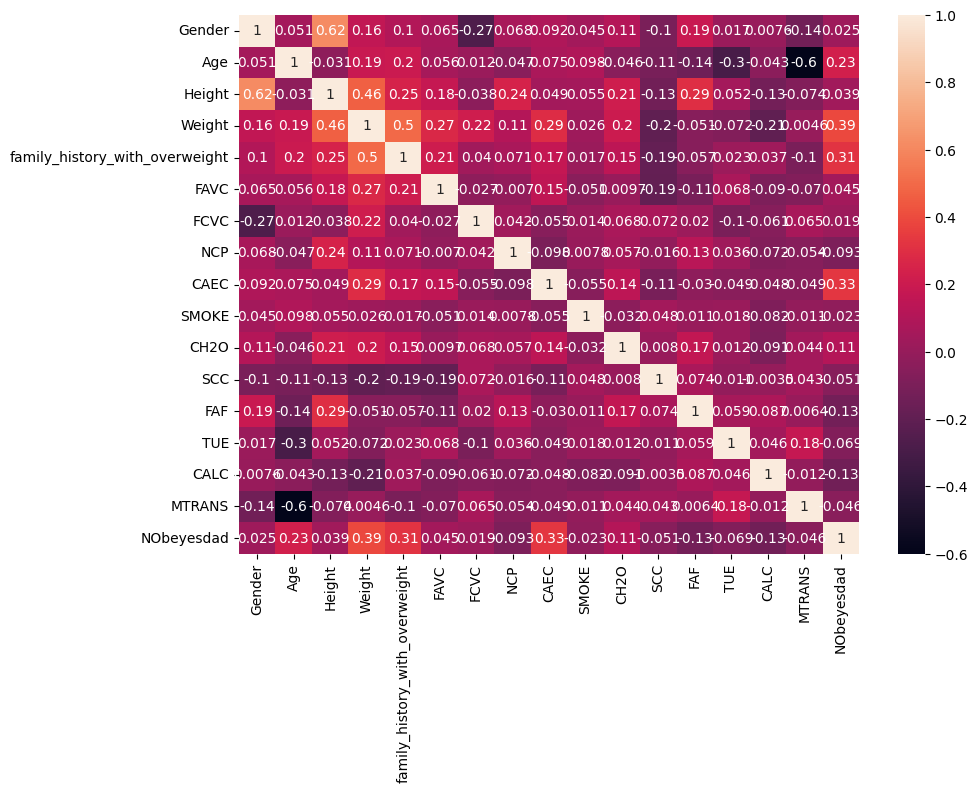

In [490]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True)

In [503]:
# Dependent and Indeoendent Features

X = df.iloc[:,:-1]
y = df['NObeyesdad']


# Spliting Train and Test Data

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify = y)

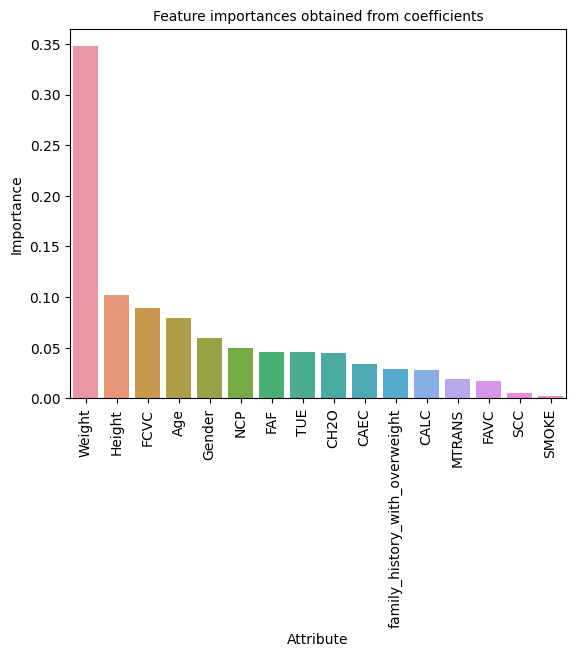

In [478]:
# Feature importance 

# RandomForestClassifier


model = RandomForestClassifier()
model.fit(X_train, y_train)

# Importance rankings
imp = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})

imp = importances.sort_values(by='Importance', ascending=False)

sns.barplot(x = imp['Attribute'], y = imp['Importance'])
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

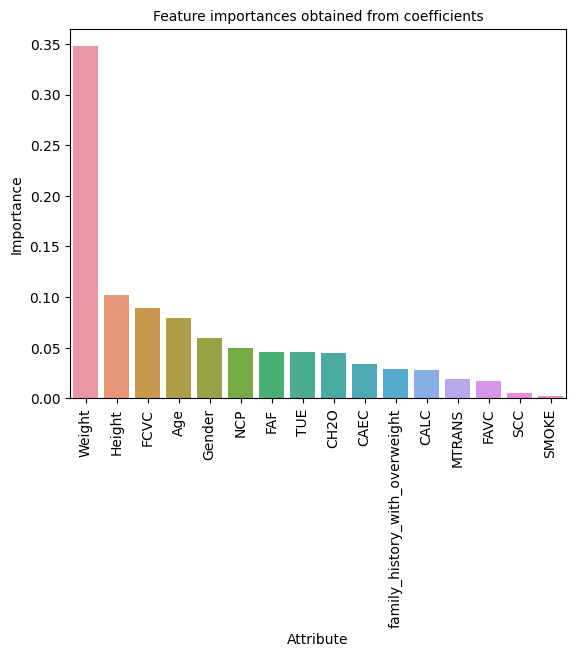

In [483]:
# LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

imp = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})

imp = importances.sort_values(by='Importance', ascending=False)


sns.barplot(x = imp['Attribute'], y = imp['Importance'])
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

Weight, Height, FCVC, Age has higher importance

In [513]:
# Model and params

models = {
    "Decision_Tree": DecisionTreeClassifier(),
    "Random_Forest": RandomForestClassifier(),
    "XG_Boost": XGBClassifier(),
    "Grad_Boost": GradientBoostingClassifier()
}

params= {"Decision_Tree": 
        {
            # 'criterion':['gini', 'entropy'],
            'min_samples_split':[2,4],
            'random_state':[42],
            'min_samples_leaf':[1,2]
        },
        
        "Random_Forest":
        {
            # 'criterion':['gini', 'entropy'],
            'n_estimators': [100,112],
            'min_samples_split':[2],
            'random_state':[42],
            'max_depth':[4,5]
        },
         
         "XG_Boost":
         {
             'eta': [.0001,.001],
             'alpha' : np.arange(0.1,1,0.1),
             'n_estimators':[123,100], 
             'random_state':[30],
             'colsample_bytree':[0.1,0.5],
             'subsample':[0.5],
             'max_depth':[3,4,5],
             'min_child_weight':[1,2,3]
         },
         
         "Grad_Boost":
         {
             "n_estimators":[100,123],
             'learning_rate':[0.1,0.01],
             'random_state':[42],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2]
         }
         
        }

In [514]:
# Model building

logging.basicConfig(filename="log_file.log",level=logging.INFO,format='%(asctime)s %(levelname)s %(message)s')


class model_training:
    
    def __init__(self,X_train,X_test,y_train,y_test,models,param_grid):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.models = models
        self.param_grid = param_grid

    def eval_model(self):
        
        try:
        
            report = {}
            classificationreport = {}
            final_model = {}
            confusionmatrix = {}

            for i in models:
                mo_dels = models[i]

                model = GridSearchCV(mo_dels,cv = 5, param_grid = params[i])

                model.fit(X_train,y_train)

                y_train_pred = model.predict(X_train)

                y_test_pred = model.predict(X_test)
                
                # Test and train scores

                train_model_score = accuracy_score(y_train,y_train_pred)

                test_model_score = accuracy_score(y_test,y_test_pred)

                classificationreport[i] = classification_report(y_test,y_test_pred)

                precision = precision_score(y_test,y_test_pred,average = 'weighted')

                recall = recall_score(y_test,y_test_pred,average = 'weighted')

                f1score = f1_score(y_test,y_test_pred,average = 'weighted')
                
                confusionmatrix[i] = confusion_matrix(y_test,y_test_pred)

                report[i] = {'accuray_score':test_model_score,
                             'precision':precision,
                             'recall':recall,
                             'f1score':f1score}

                final_model[i] = model

                logging.info('Model training completed')
                
            return report,classificationreport,final_model,confusionmatrix


            
        
        except Exception as e:
            logging.error("Exception occurred", traceback.format_exc())
    
    
    def save_model(self,file_name,model_config):
        try:
            with open(file_name, "wb") as file_obj:
                pickle.dump(model_config,file_obj)
                
                logging.info('File Saved')
                
        except Exception as e:
            logging.error("Exception occurred", traceback.format_exc())
            
            


In [517]:
# Model Training

model_trained = model_training(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param_grid = params)

report,classificationreport,final_model,confusionmatrix = model_trained.eval_model()

In [552]:
# Scores of different models 

scores = pd.DataFrame.from_dict(model_report, orient='index')

model_score = scores[scores['accuray_score'] == max(scores['accuray_score'])].values[0][0]

best_model = scores[scores['accuray_score'] == max(scores['accuray_score'])].index[0]

model_config = final_model[best_model]

classifcation_report = classificationreport[best_model]

confusion_matrix = confusionmatrix[best_model]


# Saving the model as pickle file 

model_trained.save_model('model.pickle',model_config)

In [553]:
scores

,accuray_score,precision,recall,f1score
Decision_Tree,0.903785,0.904897,0.903785,0.904163
Random_Forest,0.943218,0.950266,0.943218,0.944690
XG_Boost,0.922713,0.923516,0.922713,0.923020
Grad_Boost,0.951104,0.952122,0.951104,0.951160


In [555]:
print('model_score:',model_score)
print('best_model:',best_model)

model_score: 0.9511041009463722
best_model: Grad_Boost


In [558]:
print(confusion_matrix)

[[ 77   5   0   0   0   0   0]
 [  2  81   0   0   0   3   0]
 [  0   0 103   1   0   2   0]
 [  0   0   1  88   0   0   0]
 [  0   0   0   1  96   0   0]
 [  0   8   0   0   0  75   4]
 [  0   0   3   0   0   1  83]]
